# Visualization of QI Questions

Imports

In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from utils.file_ops import *


Set the clinic to be visualized here

In [102]:
CLINIC = 'arbor'
# CLINIC = 'pfc'

Read in the results of dataprocessing

In [103]:
results_dict = read_from_file('qi_results_dict_mom')

Set up the visualization environment 

In [104]:
sns.set()
sns.set_style("white")
sns.set_context("notebook")

Begin visualizations

In [105]:
one_clinic_results = results_dict[CLINIC]
qi_columns = ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax','QIMammo', 'QIMentalHealth1', 'QIMentalHealth2', 'QIMicroalbumin','QIPHQ1', 'QIPHQ2', 'QIPap']

Let's look at our diabetes data first 

In [106]:
one_clinic_results['QIDiabetes'].head()

,Negative,Not Questioned,Positive
time_point,,,
10/2017 - 11/2017,31,0,2
11/2017 - 12/2017,20,0,4
12/2017 - 1/2018,25,0,3
1/2018 - 2/2018,17,0,3
2/2018 - 3/2018,32,0,0


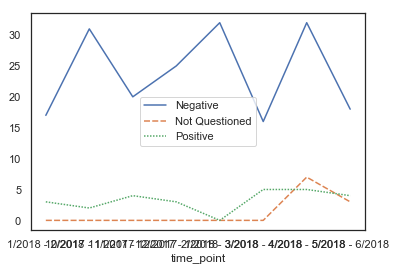

In [107]:
sns.lineplot(data=one_clinic_results['QIDiabetes'])

In [108]:
one_clinic_results['QIDiabetes'].columns

Index([u'Negative', u'Not Questioned', u'Positive'], dtype='object')

Text(0,0.5,'Number of patients')

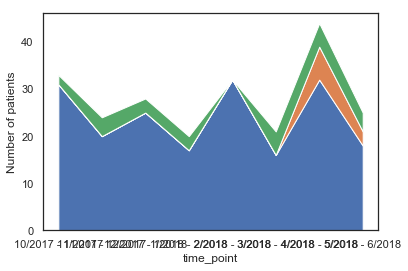

In [109]:
# TODO FIX THE STACKPLOT COLOR LABELING
plt.stackplot(one_clinic_results['QIDiabetes'].index, one_clinic_results['QIDiabetes'].values.T,
              labels=one_clinic_results['QIDiabetes'].columns)
plt.xlabel('time_point')
plt.ylabel('Number of patients')

Okay, now let's look at some of the other diabetes related things

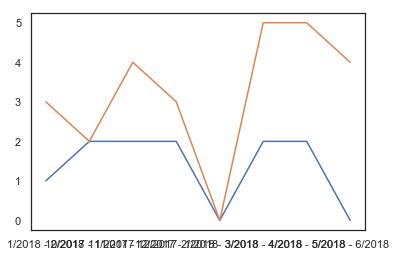

In [110]:
fig, ax = plt.subplots()
sns.lineplot(data=one_clinic_results['QIDiabetesA1C']['Checked'], markers=True, ax=ax)
sns.lineplot(data=one_clinic_results['QIDiabetes']['Positive'], ax=ax, palette=sns.color_palette("hls", 8))

[2 4 3 3 0 5 5 4]
2
[[2 2 2 1 0 2 2 0]
 [0 0 0 0 0 0 0 0]]
0
num_test is [2 2 2 1 0 2 2 0]
num_pos is 2
1
num_test is [0 0 0 0 0 0 0 0]
num_pos is 4
---
Index([u'10/2017 - 11/2017', u'11/2017 - 12/2017', u'12/2017 - 1/2018',
       u'1/2018 - 2/2018', u'2/2018 - 3/2018', u'3/2018 - 4/2018',
       u'4/2018 - 5/2018', u'5/2018 - 6/2018'],
      dtype='object', name=u'time_point')
[[1.  1.  1.  0.5 0.  1.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


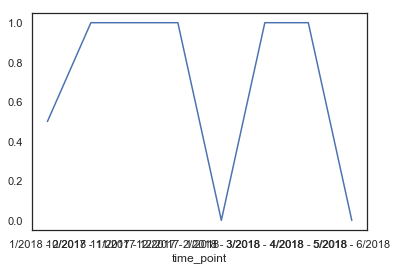

In [111]:
x = one_clinic_results['QIDiabetesA1C'].index
# y = one_clinic_results['QIDiabetesA1C'].values.T
print one_clinic_results['QIDiabetes']['Positive'].values
# y /= one_clinic_results['QIDiabetes']['Positive'].values
print len(one_clinic_results['QIDiabetesA1C'].columns)
print one_clinic_results['QIDiabetesA1C'].values.T
y = np.zeros((len(one_clinic_results['QIDiabetesA1C'].columns), len(x)))
for c, (num_pos, num_test) in enumerate(zip(one_clinic_results['QIDiabetes']['Positive'].values, one_clinic_results['QIDiabetesA1C'].values.T)):
    print c
    print 'num_test is', num_test
    print 'num_pos is', num_pos
    if num_pos != 0:
        y[c] = num_test/float(num_pos)
print '---'
print x
print y

sns.lineplot(x=x, y=y[0], dashes=True, markers=True)
# sns.lineplot(data=one_clinic_results['QIDiabetesA1C'])

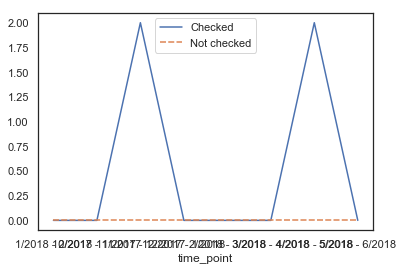

In [112]:
sns.lineplot(data=one_clinic_results['QIDiabetesFoot'])

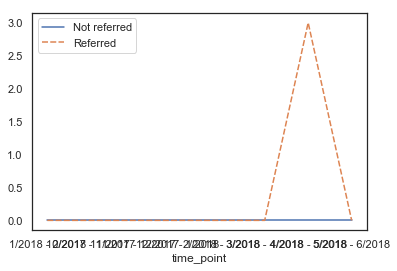

In [113]:
sns.lineplot(data=one_clinic_results['QIDiabetesOphtho'])

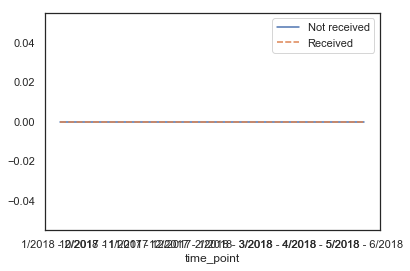

In [114]:
sns.lineplot(data=one_clinic_results['QIDiabetesPneumovax'])

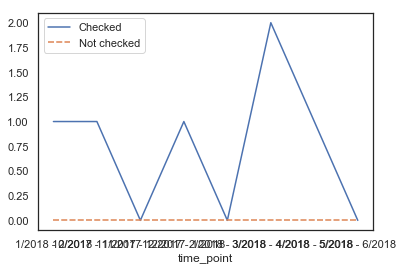

In [115]:
sns.lineplot(data=one_clinic_results['QIMicroalbumin'])

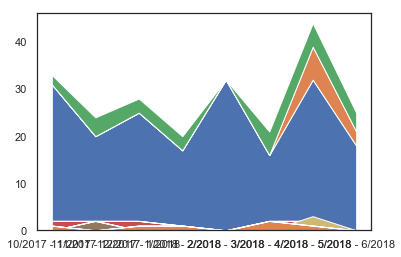

In [116]:
fig, ax = plt.subplots()
for qi_val in ['QIDiabetes', 'QIDiabetesA1C', 'QIDiabetesFoot', 'QIDiabetesOphtho', 'QIDiabetesPneumovax', 'QIMicroalbumin']:
    ax.stackplot(one_clinic_results[qi_val].index, one_clinic_results[qi_val].values.T)
#     sns.lineplot(data=one_clinic_results[qi_val], ax=ax)

In [117]:
db_df = read_from_file('diabetes_fused')
db_df_spec = db_df[CLINIC]
db_df_spec.head()

,Total Diabetic,QIDiabetesA1C,QIDiabetesFoot,QIDiabetesOphtho,QIDiabetesPneumovax,QIMicroalbumin
time_point,,,,,,
10/2017 - 11/2017,2,2,0,0,0,1
11/2017 - 12/2017,4,2,2,0,0,0
12/2017 - 1/2018,3,2,0,0,0,1
1/2018 - 2/2018,3,1,0,0,0,1
2/2018 - 3/2018,0,0,0,0,0,0


Text(0.5,1,'Diabetic Patient Quality Checks at arbor')

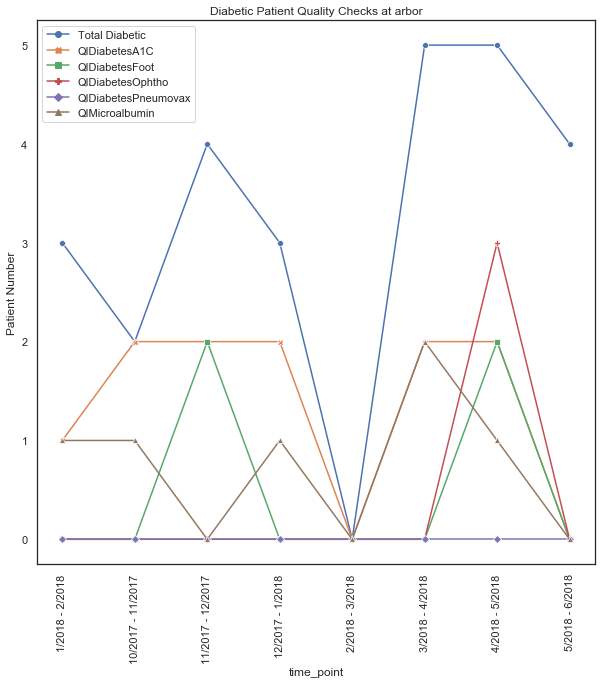

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=db_df_spec, markers=True, dashes=False, ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Patient Number')
plt.title('Diabetic Patient Quality Checks at ' + CLINIC)


AxesSubplot(0.125,0.125;0.775x0.755)


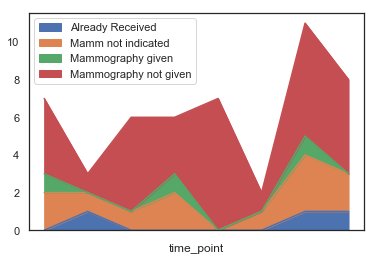

In [119]:
# sns.lineplot(data=one_clinic_results['QIMammo'])
returned = one_clinic_results['QIMammo'].plot.area()
print returned

Text(0.5,1,'Visualized QI Mammo Responses')

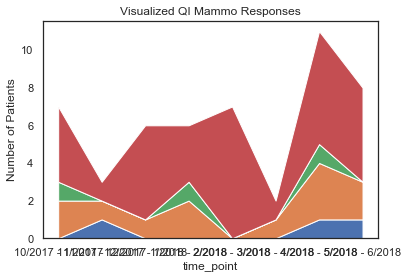

In [120]:
plt.stackplot(one_clinic_results['QIMammo'].index, one_clinic_results['QIMammo'].values.T)
plt.xlabel('time_point')
plt.ylabel('Number of Patients')
plt.title('Visualized QI Mammo Responses')